# PART 1 - Ford GoBike System Data Explorartion

## by Samuel Tumilara Familusi

### Introduction

This project aims to analyze the trends in bike sharing within the Greater San Franciso Bay Area 

It is broken up into two parts that will both demonstrate the importance and value of data visualization techniques in the data analysis process. 

In this part (1/2) I use the Python visualization libraries to systematically wrangle and explore February 2019 data (201902-fordgobike-tripdata), starting from plots of single variables and building up to plots of multiple variables.

In the following second part of the project (2/2), I test my presentation skills by producing a short presentation that illustrates interesting properties, trends, and relationships  I discovered while working on this project

In [1]:
## import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# load the dataset into a pandas dataframe
ford_bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# top 5 row in the dataframe
ford_bikes.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Check the information on the
ford_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Check for null values in each columns 
ford_bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Remove columns that have null values and wouldn't be used in this analysis
ford_bikes = ford_bikes.drop(columns=['start_station_id', 'start_station_name','end_station_id','end_station_name','member_birth_year'])

In [7]:
#Check the info of the new dataset. Member_gender still has null values 
ford_bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_latitude        0
start_station_longitude       0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Remove the null values from member_gender column
ford_bikes = ford_bikes.dropna()

In [9]:
#Check that all null values have been removed
ford_bikes.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
#Check for all duplicate values. 0 indicates there are none
ford_bikes.duplicated().sum()

0

### What is the structure of your dataset?


In [11]:
ford_bikes.shape

(175147, 11)

After cleaning, my dataset contains a total of 174,974 rows and 16 columns. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding out what time of the day, day of the week, month of the year were most trips taken.
I'm also interested in finding out how user type and gender influnces rides.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the start_date to be the most important feature as it will provide me the information needed for this exploration because I would extract the day, week, and month columns from start date. 



# 2. UNIVARIATE EXPLORATION

In this section, i will investigate distributions of individual variables. If i see unusual points or outliers,i will take a deeper look to clean things up and prepare yourself to look at relationships between variables.

Rubric Tip: I will Use the "Question-Visualization-Observations" framework throughout the exploration. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.

In [12]:
#Change the start and end time columns to data time Datetime
ford_bikes['start_time'] = pd.to_datetime(ford_bikes['start_time'])
ford_bikes['end_time'] = pd.to_datetime(ford_bikes['end_time'])

In [13]:
#Change the data type to a categorical datatype for the user type column
ford_bikes['user_type'] = ford_bikes['user_type'].astype('category')

In [14]:
# extract the month, day, and day of week from the 'start_day'
ford_bikes['start_day'] = ford_bikes['start_time'].dt.day_name()
ford_bikes['start_month'] = ford_bikes['start_time'].dt.month_name()
ford_bikes['start_year'] = ford_bikes['start_time'].dt.year
ford_bikes['start_hr'] = ford_bikes['start_time'].dt.hour
ford_bikes['start_hr'] = ford_bikes.start_hr

In [15]:
#Check for the new extracted columns
ford_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_latitude   175147 non-null  float64       
 4   start_station_longitude  175147 non-null  float64       
 5   end_station_latitude     175147 non-null  float64       
 6   end_station_longitude    175147 non-null  float64       
 7   bike_id                  175147 non-null  int64         
 8   user_type                175147 non-null  category      
 9   member_gender            175147 non-null  object        
 10  bike_share_for_all_trip  175147 non-null  object        
 11  start_day                175147 non-null  object        
 12  start_month     

In [16]:
#Check for the statistocal values of the dataset
ford_bikes.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,start_year,start_hr
count,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.0,175147.000000
mean,704.211845,37.770814,-122.351305,37.771007,-122.350881,4482.252639,2019.0,13.456297
std,1641.608363,0.101070,0.118453,0.100978,0.118018,1658.303747,0.0,4.733351
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,2019.0,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3802.000000,2019.0,9.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397405,4959.000000,2019.0,14.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.285171,5505.000000,2019.0,17.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2019.0,23.000000


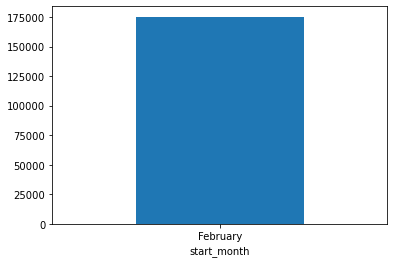

In [17]:
#Thsi checks the start month for all trips is in February, and no other month according to the dataset.
ford_bikes.groupby(['start_month']) ['start_month'].count().plot(kind='bar');
plt.xticks(rotation=0);

## 2.1 Exploring Start Day

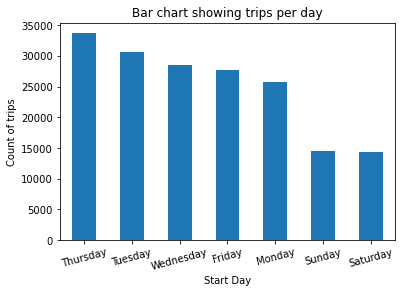

In [18]:
#Exploring to check which day of the week has the highest starts for bike rides
sorted_ford_bikes = ford_bikes.groupby(['start_day'])['start_day'].count()
sorted_ford_bikes.sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation=15);
plt.ylabel('Count of trips')
plt.xlabel('Start Day')
plt.title('Bar chart showing trips per day');
plt.show()



Most rides are taken on thursday

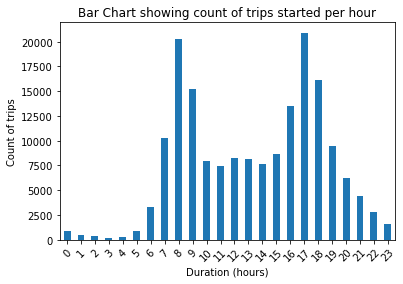

In [19]:
#Investigating what hour of the day the most rides were taken
ford_bikes.groupby(['start_hr']) ['start_hr'].count().plot(kind='bar');
plt.xticks(rotation=45);
plt.ylabel('Count of trips')
plt.xlabel('Duration (hours)')
plt.title('Bar Chart showing count of trips started per hour');

Most rides were initated at the 8th hour of the day (8:00am), and the 17th hour of the day (5:00pm). It is safe to assume that most people that use the bike hailing service use them to and from their work places

## 2.2 Exploring Duration

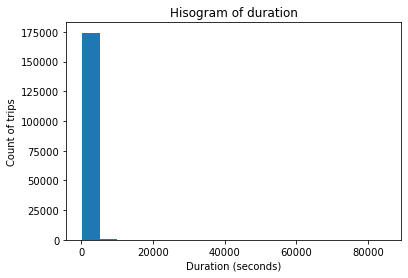

In [20]:
# We investigates the duration of trips by plotting a histogram of duration. 
bins = np.arange(61, 84548+5000, 5000)

plt.hist(data=ford_bikes, x='duration_sec', bins=bins)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count of trips')
plt.title('Hisogram of duration');

In [21]:
# find the outliers
outliers_df = ford_bikes.query('duration_sec > 20000')
outliers_df.shape

(173, 15)

In [22]:
#ford_bikes without outliers
ford_bikes = ford_bikes.query("duration_sec <= 20000")

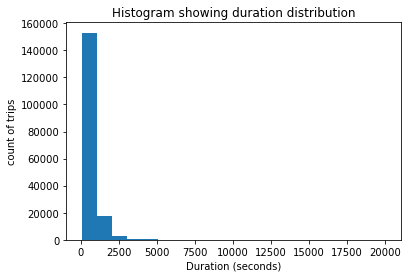

In [23]:
# set bins for the duration histogram
bins = np.arange(61, 20000+1000, 1000)

# plot the histogram
plt.hist(data=ford_bikes, x='duration_sec', bins=bins)
plt.ylabel('count of trips')
plt.xlabel('Duration (seconds)')
plt.title('Histogram showing duration distribution');

In [24]:
#Describing the dataset on the logarithimc scale
np.log10(ford_bikes.duration_sec.describe())

count    5.242974
mean     2.820583
std      2.867728
min      1.785330
25%      2.509203
50%      2.707570
75%      2.896526
max      4.300726
Name: duration_sec, dtype: float64

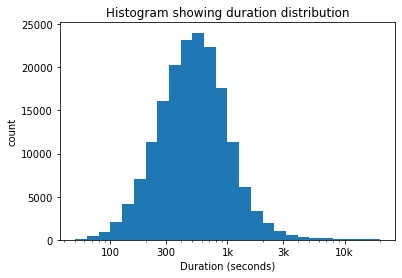

In [25]:
# set bins and ticks for the duration histogram
bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
ticks = [100, 300, 1000, 3000, 10000]
labels = [100, 300, '1k', '3k', '10k']

# plot the histogram
plt.hist(data = ford_bikes, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylabel('count')
plt.xlabel('Duration (seconds)')
plt.title('Histogram showing duration distribution');

The duration display shows an unimodal distribution with the maximum duration close 500 seconds

## 2.3 Exploring User Type

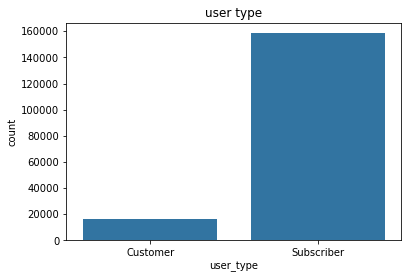

In [26]:
# plot data related to 'user_type'
base_color = sb.color_palette()[0]
sb.countplot(data=ford_bikes, x='user_type', color=base_color)
plt.title('user type');

Its is more than obvious that subscribers take more trips than regualr customers

## 2.4 Exploring Location

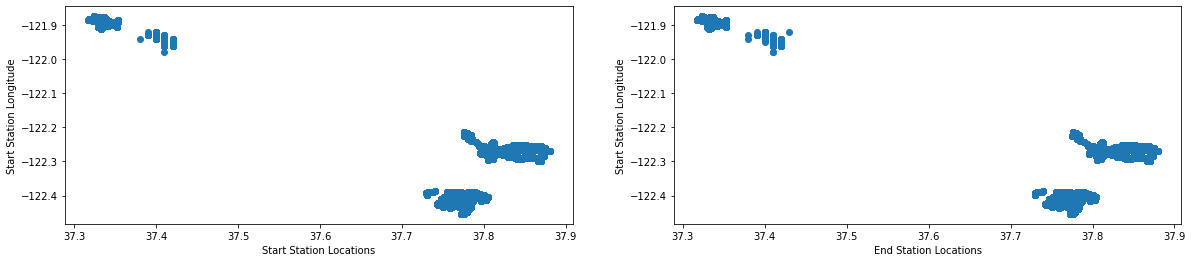

In [27]:
# distribution of start location and end location
plt.figure(figsize=[20, 4])

plt.subplot(1, 2, 1)
plt.scatter(data= ford_bikes, x='start_station_latitude', y='start_station_longitude')
plt.ylabel('Start Station Longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data=ford_bikes, x='end_station_latitude', y='end_station_longitude')
plt.ylabel('Start Station Longitude')
plt.xlabel('End Station Locations');

In [28]:
# distance between start and end stations
ford_bikes['distance'] = np.sqrt((ford_bikes.start_station_longitude - ford_bikes.end_station_longitude) ** 2
                               + (ford_bikes.start_station_latitude - ford_bikes.end_station_latitude) ** 2)

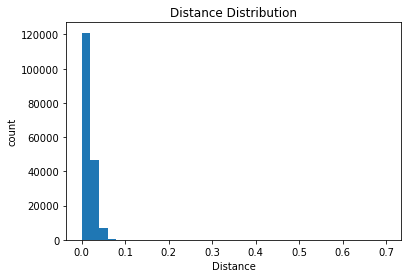

In [29]:
# plot the patterns of distance
bins = np.arange(0, 0.7+0.02, 0.02)
plt.hist(data=ford_bikes, x='distance', bins=bins)
plt.ylabel('count')
plt.xlabel('Distance')
plt.title('Distance Distribution');

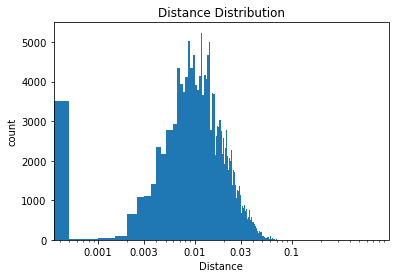

In [30]:
bins = np.arange(0, 0.7+0.0005, 0.0005)
ticks = [0.001, 0.003, 0.01, 0.03, 0.1]

plt.hist(data= ford_bikes, x='distance', bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.ylabel('count')
#plt.xlim(0, 0.1)
plt.xlabel('Distance')
plt.title('Distance Distribution');

The plot shows that about 3500 observations have distance below 0.0005.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration in second (durection_sec) has outliers, i dropped 215 outliers so i can visualize the data, after dropping the outliers, the plot was still right skewed so i applied the log transform.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


The duration in second variable has outliers, I dropped the outliers because they in a very small proportion compared to the entire dataset. 

# 3. BIVARIATE EXPLORATION 

In this section,i will investigate relationships between pairs of variables in the data.

### 3.1 Start hour and duration

In the next cells, i will plot the realtionship between the Start hour and the duration of rides

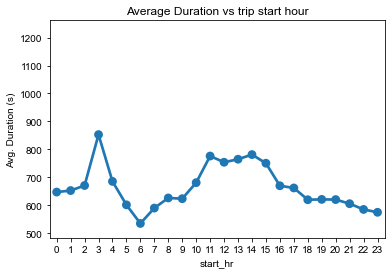

In [31]:
# Plot the duration with respect to month
sb.pointplot(data=ford_bikes, x='start_hr', y='duration_sec', errwidth=0)
sb.set(rc = {'figure.figsize':(8,12)})
plt.xlabel('start_hr')
plt.ylabel('Avg. Duration (s)')
plt.title('Average Duration vs trip start hour');

This shows that people that start their trip in the third hour ride the longest time on average 

### 3.2 Distance and Duration

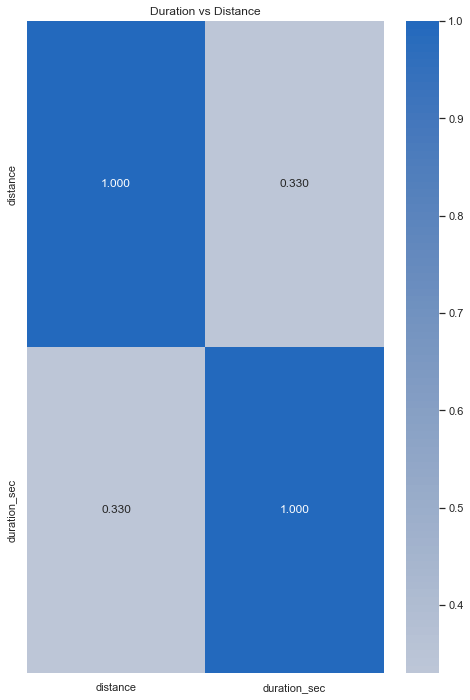

In [32]:
#This code block checks for the correlation between distance and duration in the dataset
sb.heatmap(ford_bikes[['distance', 'duration_sec']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Duration vs Distance');

The relationship between distance and durations shows a low correlation

### 3.3 User Type and Duration

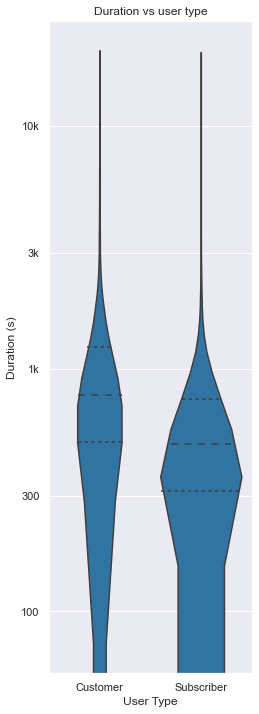

In [33]:
#Thsi codeblock creates a box plot comparing median and mode for the user_type and duration columns
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']

plt.subplot(1, 2, 1)
sb.violinplot(data=ford_bikes, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.title('Duration vs user type');

The boxplot shows that the Median and Mode rides for customers are higher than that of subsribers 

### 3.4 Duration and Gender  

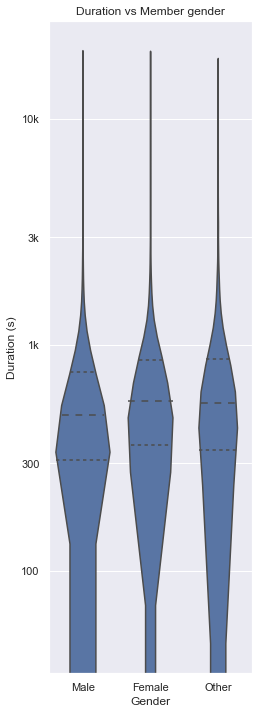

In [34]:
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']
base_color = sb.color_palette()[0]

# plot the violinplot for the gender
plt.subplot(1, 2, 2)
sb.violinplot(data=ford_bikes, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Gender')
plt.ylabel('Duration (s)')
plt.title('Duration vs Member gender');

All genders show a similar valur for median and mode, meaning there is a

### 3.5 Gender and User Type

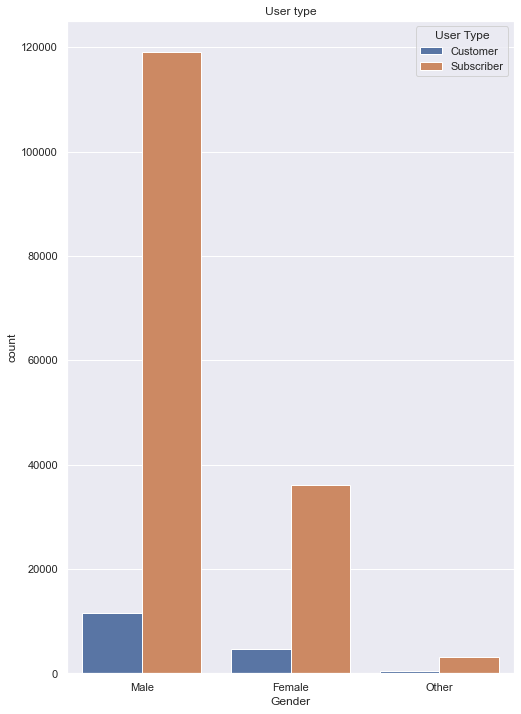

In [35]:
# Plot the relationship between member_gender and user type with a bar chart
sb.countplot(data=ford_bikes, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.legend(title='User Type')
plt.title('User type');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 

I observed that men typically ride for a longer duration even though the dataset shows an almost even distribution for all genders. 
I also observed that distance doesnt necessarily transalate to duration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 

I observed that customers spend a lot more time on a single ride than subscribers 

# 4. MULTIVARIATE EXPLORATION 

Plots of three or more variables to investigate the data even further.

### 4.1 Duration, Gender, and Usertype

In [ ]:
# relationship between user type and gender
sb.barplot(data= ford_bikes, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration (s)')
plt.title('Duration vs Gender vs User type')
plt.legend(title='User Type');

This chart shows that customers has the highest duration and male customers has the highest proportion



### 4.2 Start day, user type, gender and duration

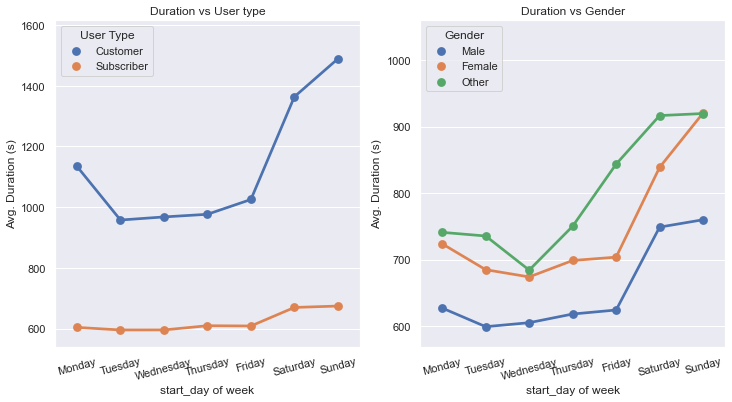

In [41]:
plt.figure(figsize=[12,6])
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']


# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_bikes, x='start_day', y='duration_sec', hue='user_type', errwidth=0, order =day_order)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')
plt.title('Duration vs User type')
plt.xticks(rotation=15);

# plot the point plot of month vs gender
plt.subplot(1, 2, 2)
sb.pointplot(data=ford_bikes, x='start_day', y='duration_sec', hue='member_gender', errwidth=0, order = day_order)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender')
plt.xticks(rotation=15);
plt.title('Duration vs Gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


The longest ride duration happens on sundays, and the customers go on more trips than suscribers

### Were there any interesting or surprising interactions between features?

The customer ride duration spikes on on saturday and sunday while the subscriber ride duration increases only slightly on those days. 



# CONCLUSION

    1. People spend longer riding on saturdays and sundays 
    2. There are more people renting bikes for trips to and from work 
    3. There is an even distribution of genders but there are more male riders.
    4. There is very little correlation between duration and distance 